In [159]:
import pandas as pd
import csv
import re

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [145]:
def read_text_file(path):
    data = []
    with open(path, 'r') as fd:
        reader = csv.reader(fd)
        for row in reader:
            current = row[0].split("\t")
            try:
                data.append((current[0], current[1]))
                print("Found", current[1])
            except:
                print("Sentiment Not Found")
            
            
    return data

In [146]:
DATASET_AMAZON = "data/amazon_cells_labelled.txt"
DATASET_YELP = "data/yelp_labelled.txt"
DATASET_IMDB = "data/imdb_labelled.txt"

DATASET = read_text_file(DATASET_AMAZON) + read_text_file(DATASET_YELP) + read_text_file(DATASET_IMDB)

Found 0
Sentiment Not Found
Found 1
Found 0
Found 1
Found 0
Sentiment Not Found
Found 1
Sentiment Not Found
Found 0
Found 1
Found 1
Found 0
Found 1
Sentiment Not Found
Found 1
Found 0
Found 1
Found 1
Found 0
Sentiment Not Found
Found 1
Found 0
Found 1
Found 0
Found 1
Found 1
Found 0
Found 0
Found 0
Sentiment Not Found
Found 1
Found 0
Found 0
Found 1
Found 0
Found 1
Found 0
Found 1
Found 0
Sentiment Not Found
Found 0
Found 1
Found 0
Found 1
Found 1
Found 0
Found 0
Found 1
Found 0
Found 0
Found 1
Found 1
Found 1
Found 1
Found 1
Found 0
Found 1
Found 1
Found 0
Found 0
Sentiment Not Found
Found 1
Found 0
Found 0
Found 0
Sentiment Not Found
Found 1
Found 1
Found 1
Found 0
Sentiment Not Found
Found 1
Found 1
Found 1
Found 1
Found 0
Found 1
Sentiment Not Found
Found 0
Found 1
Found 0
Sentiment Not Found
Found 0
Sentiment Not Found
Found 1
Found 1
Found 0
Found 1
Found 1
Sentiment Not Found
Found 1
Found 1
Found 0
Found 0
Found 1
Found 0
Found 0
Found 1
Found 0
Found 1
Sentiment Not Found
Foun

Found 0
Sentiment Not Found
Found 0
Sentiment Not Found
Sentiment Not Found
Sentiment Not Found
Found 1
Found 0
Sentiment Not Found
Found 1
Sentiment Not Found
Found 1
Found 1
Found 1
Sentiment Not Found
Sentiment Not Found
Found 0
Found 0
Sentiment Not Found
Sentiment Not Found
Found 0
Found 1
Found 1
Found 0
Found 0
Sentiment Not Found
Found 0
Found 0
Sentiment Not Found
Found 1
Found 1
Found 0
Found 1
Sentiment Not Found
Sentiment Not Found
Found 1
Sentiment Not Found
Found 0
Found 0
Found 1
Found 0
Found 1
Sentiment Not Found
Sentiment Not Found
Found 1
Found 1
Found 1
Found 0
Found 1
Found 1
Found 0
Found 1
Sentiment Not Found
Found 0
Found 1
Sentiment Not Found
Found 1
Found 0
Found 0
Sentiment Not Found
Sentiment Not Found
Found 0
Found 1
Found 0
Sentiment Not Found
Found 0
Sentiment Not Found
Found 0
Found 1
Found 1
Found 0
Found 0
Found 0
Found 1
Found 0
Found 0
Found 1
Sentiment Not Found
Found 1
Sentiment Not Found
Found 1
Found 1
Sentiment Not Found
Found 0
Found 1
Found 1


Found 1
Found 1
Found 0
Found 0
Found 0
Found 0
Found 1
Found 1
Found 1
Found 1
Sentiment Not Found
Found 1
Sentiment Not Found
Sentiment Not Found
Sentiment Not Found
Found 0
Found 0
Sentiment Not Found
Sentiment Not Found
Found 0
Found 1
Sentiment Not Found
Found 0
Sentiment Not Found
Sentiment Not Found
Found 0
Found 0
Found 0
Sentiment Not Found
Found 1
Found 1
Found 1
Found 1
Found 1
Found 1
Found 1
Found 1
Found 1
Found 0
Found 1
Sentiment Not Found
Sentiment Not Found
Found 0
Found 0
Sentiment Not Found
Found 0
Found 0
Found 0
Sentiment Not Found
Found 0
Sentiment Not Found
Sentiment Not Found
Found 0
Sentiment Not Found
Sentiment Not Found
Found 1
Sentiment Not Found
Found 0
Sentiment Not Found
Sentiment Not Found
Found 0
Found 0
Sentiment Not Found
Found 0
Found 0
Sentiment Not Found
Found 0
Found 0
Found 0
Found 0
Sentiment Not Found
Found 0
Sentiment Not Found
Found 0
Found 0
Found 0
Found 0
Sentiment Not Found
Sentiment Not Found
Sentiment Not Found
Found 0
Found 0
Found 0


In [147]:
df = pd.DataFrame(DATASET, columns=['text', 'sentiment']) 
df.head()

,text,sentiment
0,So there is no way for me to plug it in here i...,0
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [148]:
TEXT_CLEANING_RE = "@\S+|https?:\S+|http?:\S|[^A-Za-z0-9]+"
STOP_WORDS = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = re.sub(TEXT_CLEANING_RE, ' ', str(text).lower()).strip()
    words = word_tokenize(text) # tokenized words
    
    filter_text = [w for w in words if not w in STOP_WORDS]
    
    for text in filter_text:
        text = lemmatizer.lemmatize(text)
    
    return " ".join(filter_text)

In [151]:
df.text = df.text.apply(lambda x: preprocess(x))
df.head()

,text,sentiment
0,way plug us unless go converter,0
1,great jawbone,1
2,tied charger conversations lasting 45 minutes ...,0
3,mic great,1
4,jiggle plug get line right get decent volume,0


## Understanding the Data

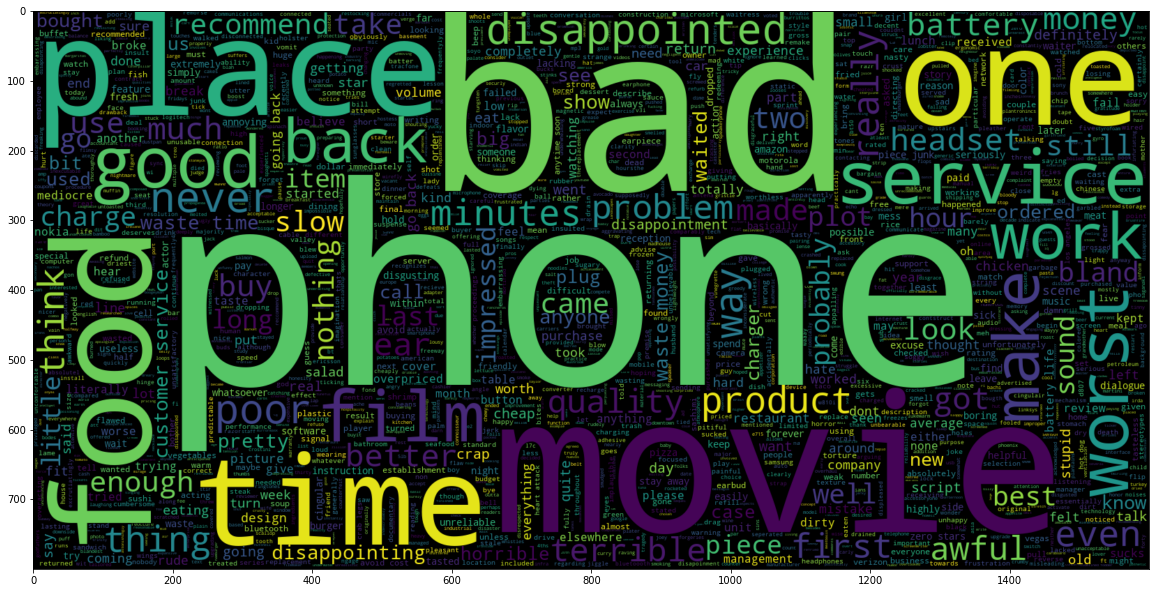

In [155]:
# negative
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == '0'].text))
plt.imshow(wc , interpolation = 'bilinear')

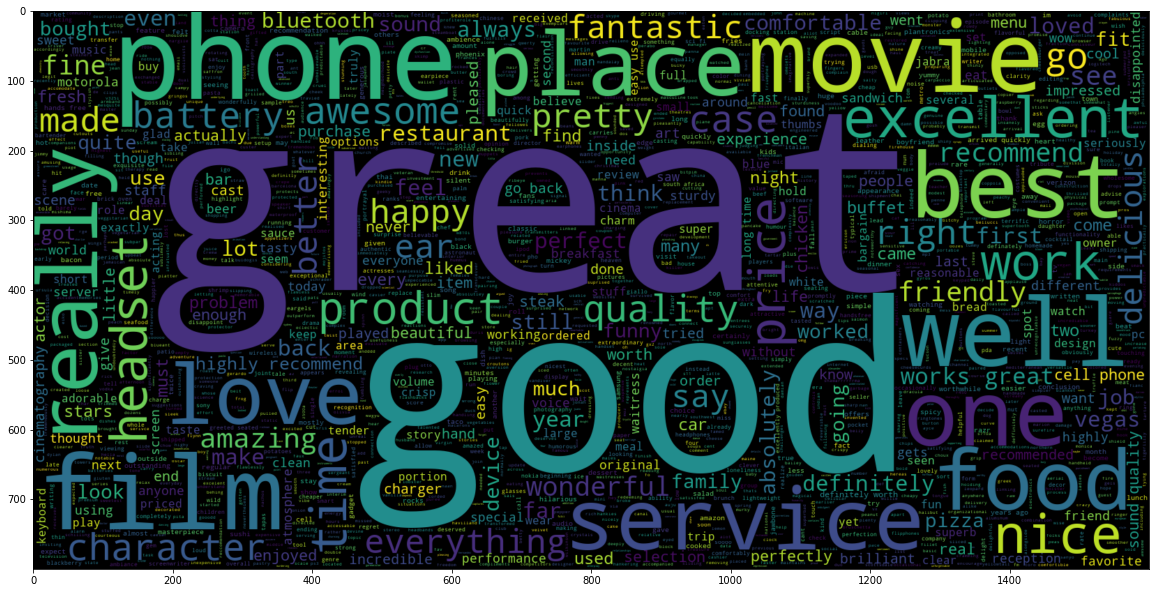

In [156]:
# positive
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.sentiment == '1'].text))
plt.imshow(wc , interpolation = 'bilinear')

## Splitting Data

In [157]:
X, Y = list(df['text']), list(df['sentiment'])

In [160]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("TRAIN size:", len(X_train))
print("TEST size:", len(X_test))

TRAIN size: 1547
TEST size: 387
